## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing Dataset

In [ ]:
dfx = pd.read_csv('Test1.csv')

In [ ]:
dfx

,Unnamed: 0,Insurance_Type,Diagnosed,Living_situation,Housing_Utilities,Housing_Rent_Mortgage,Empl_status,Empl_#hrs,Empl_job_security,Edu_level,...,Location,Ethnicity,Marital_status,Income,Housing_security,Health_literacy,Transportation,Community_saftey,Food_security,Social_engagement
0,0,Medicaid and Medicare Insurance Plan,Yes,Live alone in my own home,sometimes,sometimes,"Disabled, Not able to work",NaN,NaN,Some college but no degree,...,Suburban area around a larger city,White,Married,"$70,000 - $79,999",3.25,1.0,2.50,2.0,2.25,2.75
1,1,Medicaid Insurance Plan,No,Live in a household with other people,rarely,Never,Working full time,31 - 40 hours,NaN,High school degree or equivalent (eg. GED),...,Rural area,White,"Single, never married","$20,000 - $29,999",1.75,2.0,2.50,1.2,1.75,3.00
2,2,Medicaid Insurance Plan,Yes,Live in a household with other people,often,often,Not working (looking for a job),NaN,NaN,Some college but no degree,...,Urban city area,White,"Single, never married","$10,000 - $19,000",3.25,1.0,3.00,3.0,3.75,3.75
3,3,Medicaid and Medicare Insurance Plan,Yes,Live in a household with other people,often,often,"Disabled, Not able to work",NaN,NaN,High school degree or equivalent (eg. GED),...,Urban city area,White,"Single, never married","$20,000 - $29,999",3.00,1.0,3.75,3.6,2.00,4.75
4,4,Medicaid Insurance Plan,No,Live in a household with other people,often,Always,Not working (not looking for a job),NaN,NaN,High school degree or equivalent (eg. GED),...,Small town far outside a large city,White,Married,"$10,000 - $19,000",4.50,2.5,2.25,2.6,2.75,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,408,Medicaid and Medicare Insurance Plan,No,Live alone in my own home,Always,often,Retired,NaN,NaN,High school degree or equivalent (eg. GED),...,Small town far outside a large city,White,Divorce,"$10,000 - $19,000",3.25,2.5,1.75,2.2,3.25,2.75
409,409,Medicaid and Medicare Insurance Plan,No,Live in a household with other people,sometimes,rarely,Retired,NaN,NaN,Associate degree,...,Rural area,White,Married,"$20,000 - $29,999",1.75,2.5,1.00,2.0,1.25,4.00
410,410,Medicaid and Medicare Insurance Plan,No,Live in a household with other people,rarely,rarely,Retired,NaN,NaN,High school degree or equivalent (eg. GED),...,Rural area,White,Married,"$20,000 - $29,999",2.00,2.5,1.00,1.2,2.00,1.75
411,411,Medicaid and Medicare Insurance Plan,No,Live in a household with other people,often,often,Working full time,31 - 40 hours,sometimes,Bachelors degree,...,Urban city area,White,Married,"$50,000 - $59,999",4.50,2.5,2.25,2.0,1.75,1.25


# Radar Chart

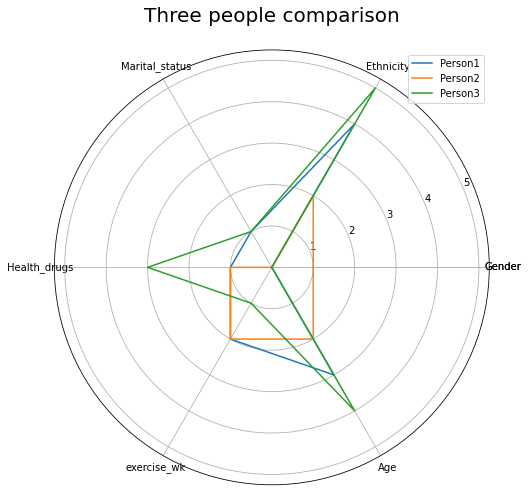

In [ ]:
Category = ['Gender','Ethnicity',
         'Marital_status','Health_drugs','exercise_wk','Age'
         ]
Category = [*Category, Category[0]]

Person1 = [0,4,1,1,2,3]
Person2 = [1,2,0,1,2,2]
Person3 = [0,5,1,3,1,4]
Person1 = [*Person1, Person1[0]]
Person2 = [*Person2, Person2[0]]
Person3 = [*Person3, Person3[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Person1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, Person1, label='Person1')
plt.plot(label_loc, Person2, label='Person2')
plt.plot(label_loc, Person3, label='Person3')
plt.title('Three people comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=Category)
plt.legend()
plt.show()

In [ ]:
dfx.isnull().sum()

Unnamed: 0                 0
Insurance_Type             0
Diagnosed                  0
Living_situation           0
Housing_Utilities          0
Housing_Rent_Mortgage      0
Empl_status                0
Empl_#hrs                270
Empl_job_security        289
Edu_level                  0
Health_drugs             158
exercise_wk              158
Gender                     0
Age                        0
Location                   0
Ethnicity                  0
Marital_status             0
Income                     0
Housing_security           0
Health_literacy            0
Transportation             1
Community_saftey           0
Food_security              0
Social_engagement          0
dtype: int64

**Filling all the nulls with the most occurred value**

In [ ]:
dfx = dfx.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
dfx.drop(['Unnamed: 0'], axis=1, inplace=True)

**Labelling all the non numeric categorical data using Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categ = ['Insurance_Type','Diagnosed','Income','Living_situation','Empl_#hrs','Housing_Utilities',
         'Housing_Rent_Mortgage','Empl_status','Edu_level','Gender','Location','Ethnicity',
         'Marital_status','Empl_job_security','Health_drugs','exercise_wk','Age'
         ]
dfx[Categ] = dfx[Categ].apply(le.fit_transform)

In [ ]:
print( list (le.classes_) )

[' 35 - 44 year', '25 - 34 years', '45 - 54 years', '55 - 64 years', '65 or older years']


In [ ]:
dfx.dtypes

Insurance_Type             int64
Diagnosed                  int64
Living_situation           int64
Housing_Utilities          int64
Housing_Rent_Mortgage      int64
Empl_status                int64
Empl_#hrs                  int64
Empl_job_security          int64
Edu_level                  int64
Health_drugs               int64
exercise_wk                int64
Gender                     int64
Age                        int64
Location                   int64
Ethnicity                  int64
Marital_status             int64
Income                     int64
Housing_security         float64
Health_literacy          float64
Transportation           float64
Community_saftey         float64
Food_security            float64
Social_engagement        float64
dtype: object

In [ ]:
print({col: {n: cat for n, cat in enumerate(dfx[col].astype('category').cat.categories)} 
     for col in dfx})

{'Insurance_Type': {0: 0, 1: 1}, 'Diagnosed': {0: 0, 1: 1}, 'Living_situation': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, 'Housing_Utilities': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Housing_Rent_Mortgage': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Empl_status': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}, 'Empl_#hrs': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Empl_job_security': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Edu_level': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, 'Health_drugs': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'exercise_wk': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, 'Gender': {0: 0, 1: 1, 2: 2}, 'Age': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 'Location': {0: 0, 1: 1, 2: 2, 3: 3}, 'Ethnicity': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, 'Marital_status': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, 'Income': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}, 'Housing_security': {0: 1.0, 1: 1.25, 2: 1.5, 3: 1.75, 4: 2.0, 5: 2.25, 6: 2.5, 7: 2.75, 8: 3.0, 9: 3.25, 10: 3.5, 11: 3.75, 12: 4.0, 13: 4.25, 14: 4.5, 15: 4.75, 

In [ ]:
dfx.head(10)

,Insurance_Type,Diagnosed,Living_situation,Housing_Utilities,Housing_Rent_Mortgage,Empl_status,Empl_#hrs,Empl_job_security,Edu_level,Health_drugs,...,Location,Ethnicity,Marital_status,Income,Housing_security,Health_literacy,Transportation,Community_saftey,Food_security,Social_engagement
0,1,1,2,4,4,2,1,4,5,1,...,3,5,5,6,3.25,1.0,2.50,2.0,2.25,2.75
1,0,0,0,3,1,6,1,4,4,1,...,1,5,2,1,1.75,2.0,2.50,1.2,1.75,3.00
2,0,1,0,2,2,0,1,4,5,1,...,0,5,2,0,3.25,1.0,3.00,3.0,3.75,3.75
3,1,1,0,2,2,2,1,4,4,1,...,0,5,2,1,3.00,1.0,3.75,3.6,2.00,4.75
4,0,0,0,2,0,3,1,4,4,1,...,2,5,5,0,4.50,2.5,2.25,2.6,2.75,5.00
5,0,1,2,1,0,6,1,4,1,1,...,3,5,2,3,2.00,1.0,1.00,2.2,3.00,3.00
6,0,0,2,1,1,6,2,4,2,1,...,3,4,2,5,1.00,2.0,1.00,1.0,1.00,2.25
7,1,0,0,4,4,1,0,4,4,1,...,1,4,2,8,2.00,1.0,1.00,1.4,3.00,1.50
8,0,0,0,4,4,0,1,4,1,1,...,0,4,2,1,3.25,1.0,3.75,2.6,2.75,3.00
9,0,1,0,3,3,5,1,4,5,1,...,0,4,5,1,2.50,3.0,2.50,1.0,2.50,2.75


In [ ]:
[0,2,1,0,6,1,4,1,1,4,0,0,3,5,2,3,2.00,1.0,1.00,2.2,3.00,3.00]

[0, 2, 1, 0, 6, 1, 4, 1, 1, 4, 0, 0, 3, 5, 2, 3, 2.0, 1.0, 1.0, 2.2, 3.0, 3.0]

In [ ]:
dir(dfx)

['Age',
 'Community_saftey',
 'Diagnosed',
 'Edu_level',
 'Empl_job_security',
 'Empl_status',
 'Ethnicity',
 'Food_security',
 'Gender',
 'Health_drugs',
 'Health_literacy',
 'Housing_Rent_Mortgage',
 'Housing_Utilities',
 'Housing_security',
 'Income',
 'Insurance_Type',
 'Living_situation',
 'Location',
 'Marital_status',
 'Social_engagement',
 'T',
 'Transportation',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__ini

In [ ]:
d1 = dfx.drop_duplicates('Insurance_Type').set_index('Insurance_Type')
print(d1)

                Diagnosed  Living_situation  Housing_Utilities  \
Insurance_Type                                                   
1                       1                 2                  4   
0                       0                 0                  3   

                Housing_Rent_Mortgage  Empl_status  Empl_#hrs  \
Insurance_Type                                                  
1                                   4            2          1   
0                                   1            6          1   

                Empl_job_security  Edu_level  Health_drugs  exercise_wk  ...  \
Insurance_Type                                                           ...   
1                               4          5             1            3  ...   
0                               4          4             1            2  ...   

                Location  Ethnicity  Marital_status  Income  Housing_security  \
Insurance_Type                                                          

In [ ]:
dfx['Age'].unique()

array([1, 0, 2, 3, 4])

## EDA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


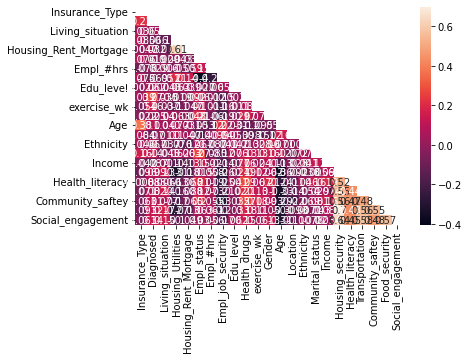

In [ ]:
# correlation heatmap for all features
corr = dfx.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

In [ ]:
targetdf = dfx.groupby('Diagnosed').apply(np.mean).head()
targetdf.style.background_gradient(cmap='Reds')

,Insurance_Type,Diagnosed,Living_situation,Housing_Utilities,Housing_Rent_Mortgage,Empl_status,Empl_#hrs,Empl_job_security,Edu_level,Health_drugs,exercise_wk,Gender,Age,Location,Ethnicity,Marital_status,Income,Housing_security,Health_literacy,Transportation,Community_saftey,Food_security,Social_engagement
Diagnosed,,,,,,,,,,,,,,,,,,,,,,,
0,0.246835,0.000000,0.886076,1.987342,1.765823,2.993671,1.139241,3.556962,3.158228,1.000000,2.000000,0.259494,1.670886,1.550633,4.487342,2.784810,4.158228,2.523734,2.063291,2.085443,1.996203,2.389241,2.545886
1,0.462745,1.000000,1.043137,1.784314,1.862745,3.070588,1.098039,3.388235,3.349020,1.478431,2.419608,0.282353,1.984314,1.368627,4.631373,3.301961,3.541176,2.759804,2.258824,2.294118,2.244706,2.706863,2.883333


**Data seems to be equally distributed and balanced corresponding to target variable**

In [ ]:
#Array to store results of different models
Model= []
Results = []

## Modelling

In [ ]:
dataset = dfx.copy()
data = dataset.sample(frac=0.80, random_state=786)
data_unseen = dataset.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (330, 23)
Unseen Data For Predictions: (83, 23)


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(dfx.drop(columns=['Diagnosed'],axis=1),
                                                    dfx['Diagnosed'],test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47        28
           1       0.73      0.80      0.77        55

    accuracy                           0.67        83
   macro avg       0.63      0.61      0.62        83
weighted avg       0.66      0.67      0.67        83



In [ ]:
accuracy_score(y_test, predictions)

0.6746987951807228

In [ ]:
Results.append(accuracy_score(y_test, predictions))

In [ ]:
Model.append('LR')

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.91      0.91      0.91        55

    accuracy                           0.88        83
   macro avg       0.87      0.87      0.87        83
weighted avg       0.88      0.88      0.88        83



In [ ]:
Results.append(accuracy_score(y_test, predictions))
Model.append('DecTree')

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(random_state=42)
gbclf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.1,0.2],
    'max_depth': [6],
    'subsample': [0.5,0.7,1],
    'n_estimators': [100]
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(gbclf,param_grid,scoring='roc_auc',cv=None,n_jobs=1)
grid_clf.fit(X_train,y_train)

best_parameters = grid_clf.best_params_

print('Grid search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name,best_parameters[param_name]))
    
training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train,training_preds)
test_accuracy = accuracy_score(y_test,test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy*100))
print('Validation Accuracy: {:.4}%'.format(test_accuracy*100))

Grid search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
n_estimators: 100
subsample: 1

Training Accuracy: 100.0%
Validation Accuracy: 91.57%


In [ ]:
print(classification_report(y_test, test_preds), '\n\n')

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.93      0.95      0.94        55

    accuracy                           0.92        83
   macro avg       0.91      0.90      0.90        83
weighted avg       0.92      0.92      0.92        83
 




In [ ]:
Results.append(accuracy_score(y_test, test_preds))
Model.append('GBC')

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_preds)

print(cf_matrix)

[[24  4]
 [ 3 52]]


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelRf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = modelRf.predict(X_test)

In [ ]:
print('True:', y_test.values[0:25])
print('False:', y_pred[0:25])

True: [1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1]
False: [1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1]


In [ ]:
import collections
collections.Counter(y_pred)

Counter({0: 24, 1: 59})

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  7]
 [ 3 52]]


0.8795180722891566

In [ ]:
Results.append(accuracy_score(y_test, y_pred))
Model.append('RF')

In [ ]:
feature_scores = pd.Series(modelRf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

exercise_wk              0.238445
Health_drugs             0.089996
Social_engagement        0.068936
Age                      0.058217
Transportation           0.052227
Food_security            0.045908
Community_saftey         0.044062
Housing_security         0.041522
Empl_status              0.039843
Housing_Utilities        0.038143
Health_literacy          0.037139
Marital_status           0.036904
Insurance_Type           0.033962
Income                   0.033090
Location                 0.027659
Ethnicity                0.024940
Edu_level                0.019901
Living_situation         0.018941
Housing_Rent_Mortgage    0.015504
Gender                   0.013254
Empl_job_security        0.012026
Empl_#hrs                0.009382
dtype: float64


### Compare & visualize all the implemented models

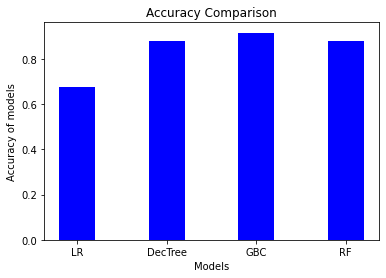

In [ ]:
# creating the bar plot
plt.bar(Model, Results, color ='blue',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy of models")
plt.title("Accuracy Comparison")
plt.show()

GBC is giving us best accuracy among all hence we will be going ahead with this model only for final results.

### Input by User

In [51]:
import pickle 
pickle.dump(gbclf,open('modelGBC.pkl','wb'))

In [52]:
def get_result_Rf(args_list):

    model = pickle.load(open('modelGBC.pkl', 'rb'))       
    cent = model.predict_proba(args_list)*100
    prediction = model.predict(args_list)
    value = round(cent[0][prediction[0]], 2)
    print(prediction)
    if prediction == 1:
        #result = "Chances of getting diagnosed with chronic condition is {0}% ".format(value)
        result = "Chances of getting diagnosed with chronic condition is very high "
    else:
        #result="Chances of not getting diagnosed with chronic condition is {0}%".format(value)
        result = "Chances of getting diagnosed with chronic condition is very Low "
    return result

In [53]:
input1 = [1,2,4,4,2,1,4,5,1,3,1,1,3,5,5,6,3.25,1.0,2.50,2.0,2.25,2.75]
input1 = np.reshape(input1, (-1, 22))
output1 = get_result_Rf(input1)
print(output1)

[1]
Chances of getting diagnosed with chronic condition is very high 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
input1 = [0,0,3,1,6,1,4,4,1,2,0,0,1,5,2,1,1.75,2.0,2.50,1.2,1.75,3.00]
input1 = np.reshape(input1, (-1, 22))
output1 = get_result_Rf(input1)
print(output1)

[0]
Chances of getting diagnosed with chronic condition is very Low 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
